<a href="https://colab.research.google.com/github/nandmohan01/A-relational-study-of-COVID-19-with-Population-Density/blob/main/pythonCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries

In [ ]:
%matplotlib inline
plt.close('all')

In [ ]:
import matplotlib
matplotlib.__version__

'3.5.3'

In [ ]:
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 27.2 MB/s 
     |████████████████████████████████| 957 kB 43.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
# Import required packages
import requests
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from matplotlib.cm import ScalarMappable
# from pandas_profiling import ProfileReport
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
profile.to_notebook_iframe()

### General parameters

In [ ]:
# setting parameters

nations = [
    'england',
    'wales',
    'scotland',
    'northern ireland'
]

england_only = [
    'areaType=nation',
    'areaName=England'
]

england_region = [
    'areaType=region'
]

utla_region = [
    'areaType=utla'
]

area_names = [
    'North East',
    'North West',
    'Yorkshire and The Humber',
    'East Midlands',
    'West Midlands',
    'East of England',
    'London',
    'South East',
    'South West'
]

cases_and_deaths = {
    "date":"date",
    "area_name":"areaName",
    "area_code": "areaCode",
    # "daily_cases":"newCasesByPublishDate",
    # "cumulative_cases":"cumCasesByPublishDate",
    # "daily_deaths" : "newDeathsByPublishDate",
    # "cumulative_deaths" : "cumDeathsByPublishDate",

    # "cumulative_complete_vaccination_count": "cumPeopleVaccinatedCompleteByVaccinationDate",
    # "vaccination_age": "vaccinationsAgeDemographics"

    # "cumulative_deaths_rate":"cumDeaths28DaysByPublishDateRate",
    # "cumulative_cases_rate":"cumCasesByPublishDateRate",
    "cumulative_deaths_rate":"cumDeaths28DaysByDeathDateRate",
    "cumulative_cases_rate":"cumCasesBySpecimenDateRate",
    # "daily_deaths":"newDeaths28DaysByPublishDate",
    # "cumulative_deaths":"cumDeaths28DaysByPublishDate",
    # "new_deaths_28days_by_death_date":"newDeaths28DaysByDeathDate",
    # "cum_deaths_28days_by_death_date":"cumDeaths28DaysByDeathDate",
    "cumulative_cases" : "cumCasesBySpecimenDate",
    "daily_cases":"newCasesBySpecimenDate",
    "cumulative_deaths":"cumDailyNsoDeathsByDeathDate",
    "daily_deaths" : "newDailyNsoDeathsByDeathDate"
}

### Functions

In [ ]:
# function to drop columns not needed for the current analysis
def tidyDataFrame(dataframe):
  df = dataframe
  df = tidyColumns(df)
  df.drop(df.iloc[:,1:19], inplace = True, axis =1)

  return df

In [ ]:
# To remove spaces and tidying the column names of the data frame
def tidyColumns(dataframe):
  dataframe.columns = dataframe.columns.str.replace(' ','_')
  dataframe.columns = dataframe.columns.str.lower()
  return dataframe

# COVID data from GOV.uk

In [ ]:
"""Install COVID-19 API -a Python SDK for the COVID-19 API, as published by Public
Health England on Coronavirus (COVID-19) in the UK. (Coronavirus Dashboard in the UK)"""
!pip install uk-covid19
from uk_covid19 import Cov19API

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Nation

In [ ]:
# # nation level data
england_df = Cov19API(filters=england_only, structure=cases_and_deaths).get_dataframe()

In [ ]:
england_df

,date,area_name,area_code,cumulative_deaths_rate,cumulative_cases_rate,cumulative_cases,daily_cases,cumulative_deaths,daily_deaths
0,2022-08-24,England,E92000001,290.3,35028.1,NaN,NaN,NaN,NaN
1,2022-08-23,England,E92000001,289.0,34979.1,19808426.0,2215.0,NaN,NaN
2,2022-08-22,England,E92000001,289.0,34979.1,19806211.0,3880.0,NaN,NaN
3,2022-08-21,England,E92000001,289.0,34979.1,19802331.0,3400.0,NaN,NaN
4,2022-08-20,England,E92000001,289.0,34979.1,19798931.0,2667.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
933,2020-02-03,England,E92000001,NaN,NaN,20.0,18.0,2.0,0.0
934,2020-02-02,England,E92000001,NaN,NaN,2.0,1.0,2.0,1.0
935,2020-02-01,England,E92000001,NaN,NaN,1.0,0.0,1.0,0.0
936,2020-01-31,England,E92000001,NaN,NaN,1.0,0.0,1.0,0.0


In [ ]:
england_df['date'] = england_df['date'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
nation_df = england_df.set_index('date')
nation_df = nation_df.loc['2021-01-01':'2021-12-31']
nation_df = nation_df.iloc[::-1]

In [ ]:
nation_df

,area_name,area_code,cumulative_deaths_rate,cumulative_cases_rate,cumulative_cases,daily_cases,cumulative_deaths,daily_deaths
date,,,,,,,,
2021-01-02,England,E92000001,115.1,3961.0,2412357.0,55428.0,82319.0,726.0
2021-01-03,England,E92000001,115.8,4043.9,2463019.0,50662.0,83003.0,684.0
2021-01-04,England,E92000001,116.4,4137.9,2533937.0,70918.0,83793.0,790.0
2021-01-05,England,E92000001,117.8,4235.0,2593535.0,59598.0,84649.0,856.0
2021-01-06,England,E92000001,119.4,4334.2,2646286.0,52751.0,85531.0,882.0
...,...,...,...,...,...,...,...,...
2021-12-27,England,E92000001,227.5,18442.5,11048702.0,155563.0,150586.0,114.0
2021-12-28,England,E92000001,227.6,18648.2,11219282.0,170580.0,150722.0,136.0
2021-12-29,England,E92000001,227.6,18891.2,11443305.0,224023.0,150828.0,106.0


In [ ]:
nation_df['daily_cases_rolling_avg'] = round(nation_df.groupby(nation_df.area_name)['daily_cases'].transform(lambda row: row.rolling(7,1).mean()),2)
nation_df['daily_deaths_rolling_avg'] = round(nation_df.groupby(nation_df.area_name)['daily_deaths'].transform(lambda row: row.rolling(7,1).mean()),2)

# Region

In [ ]:
# request England region level data
englandRegionDf = Cov19API(filters=england_region, structure=cases_and_deaths).get_dataframe()

In [ ]:
englandRegionDf.to_excel('/content/drive/MyDrive/Sheffield/regionLevelData.xlsx', index = False)

In [ ]:
englandRegionDf = pd.read_excel('/content/drive/MyDrive/Sheffield/regionLevelData.xlsx')

In [ ]:
# Total sum of missing values in each column
englandRegionDf.isnull().sum()

date                         0
area_name                    0
area_code                    0
cumulative_deaths_rate    1727
cumulative_cases_rate      623
cumulative_cases            17
daily_cases                 15
cumulative_deaths          314
daily_deaths               314
dtype: int64

In [ ]:
englandRegionDf.info()
eng_region_df = englandRegionDf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8363 entries, 0 to 8362
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    8363 non-null   object 
 1   area_name               8363 non-null   object 
 2   area_code               8363 non-null   object 
 3   cumulative_deaths_rate  6636 non-null   float64
 4   cumulative_cases_rate   7740 non-null   float64
 5   cumulative_cases        8346 non-null   float64
 6   daily_cases             8348 non-null   float64
 7   cumulative_deaths       8049 non-null   float64
 8   daily_deaths            8049 non-null   float64
dtypes: float64(6), object(3)
memory usage: 588.1+ KB


In [ ]:
# Convert the date column to appropriate datatype
eng_region_df['date'] = eng_region_df['date'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
eng_region_df = eng_region_df.set_index('date')

In [ ]:
# Keep all the entries of the year 2021
df1 = eng_region_df.loc['2021-01-01':'2021-12-31']
# Rearrange the rows in ascending order
df1 = df1.iloc[::-1]
df1 = df1.reset_index()

In [ ]:
# Handling missing values
clean_cvd_df = df1.dropna()

In [ ]:
region_cases = clean_cvd_df.groupby('area_name').max()['cumulative_cases']
print('\033[1m' + 'Total cases in each Region for year 2021 :\n' + '\033[0m')
for index, value in region_cases.items():
    print(f"{index}: {value}")

Total cases in each Region for year 2021 :

East Midlands: 1021086.0
East of England: 1237807.0
London: 1955867.0
North East: 588285.0
North West: 1743994.0
South East: 1782734.0
South West: 980507.0
West Midlands: 1218060.0
Yorkshire and The Humber: 1167636.0


In [ ]:
round(clean_cvd_df.describe(),2)

,cumulative_deaths_rate,cumulative_cases_rate,cumulative_cases,daily_cases,cumulative_deaths,daily_deaths
count,3283.00,3283.00,3283.00,3283.00,3283.00,3283.00
mean,199.85,9304.94,600450.20,2860.02,14772.33,21.38
std,41.90,3946.54,317164.09,3674.12,5074.66,38.00
min,60.50,2059.70,126559.00,44.00,4621.00,0.00
25%,177.70,6402.55,371496.50,539.50,10660.00,3.00
50%,208.00,7996.90,539824.00,2267.00,15203.00,10.00
75%,227.80,12075.60,766130.50,3653.00,19493.50,17.00
max,282.90,21737.20,1955867.00,38864.00,23889.00,294.00


In [ ]:
# Create new 7 day rolling average columns for new cases and deaths for 1000
clean_cvd_df['daily_cases_rolling_avg'] = round(clean_cvd_df.groupby(clean_cvd_df.area_name)['daily_cases'].transform(lambda row: row.rolling(7,1).mean()/1000),3)
clean_cvd_df['daily_deaths_rolling_avg'] = round(clean_cvd_df.groupby(clean_cvd_df.area_name)['daily_deaths'].transform(lambda row: row.rolling(7,1).mean()/1000),3)
# Re evaluate the cases and death rate to per 1000 person
clean_cvd_df['cumulative_cases_rate'] = clean_cvd_df['cumulative_cases_rate']/100
clean_cvd_df['cumulative_deaths_rate'] = clean_cvd_df['cumulative_deaths_rate']/100
# Re evaluate the cumulative cases and death to per 1000 person
clean_cvd_df['cumulative_cases'] = round(clean_cvd_df['cumulative_cases']/1000,2)
clean_cvd_df['cumulative_deaths'] = round(clean_cvd_df['cumulative_deaths']/1000,2)

In [ ]:
df = clean_cvd_df.groupby(['area_name','date'])['cumulative_cases'].sum() \
                          .groupby(['area_name']).max().sort_values() \
                          .groupby(['area_name']).sum().sort_values(ascending = True)

In [ ]:
df = pd.DataFrame(df).astype(int)

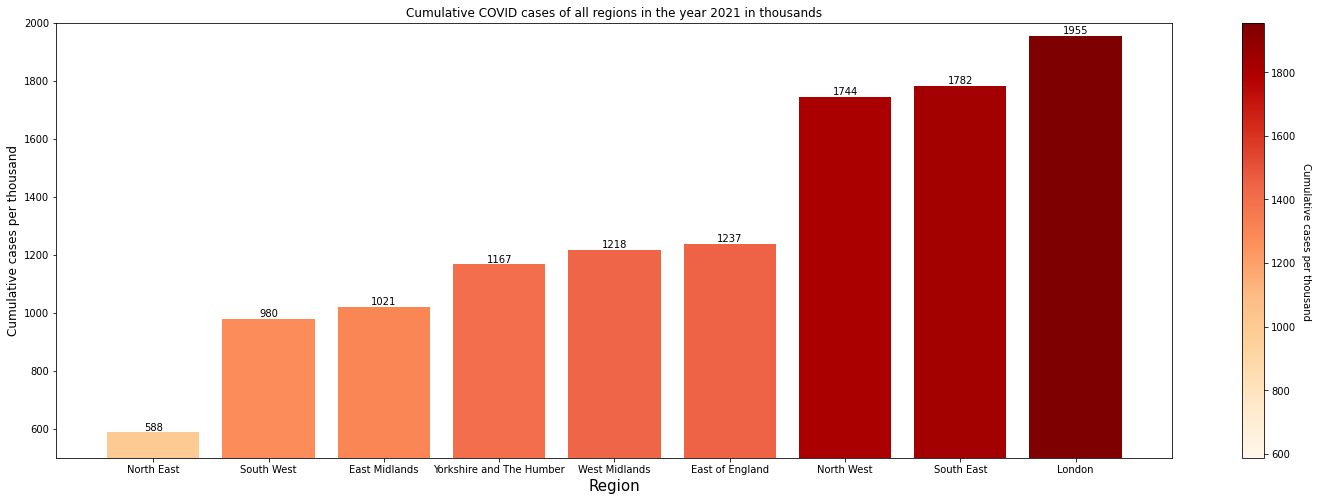

In [ ]:
from matplotlib.cm import ScalarMappable
fig, ax = plt.subplots(1,figsize=(25,8))

my_cmap = plt.cm.get_cmap('OrRd')
data_color = [x / max(df.cumulative_cases) for x in df.cumulative_cases]
colors = my_cmap(data_color)

fig = ax.bar(x=df.index, height=(df.cumulative_cases),color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(min(df.cumulative_cases),max(df.cumulative_cases)))
sm.set_array([])
ax.bar_label(fig)
plt.ylim(bottom=500,top=2000)
cbar = plt.colorbar(sm)
cbar.set_label(' Cumulative cases per thousand', rotation=270,labelpad= 15)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Cumulative cases per thousand', fontsize=12)
plt.title('Cumulative COVID cases of all regions in the year 2021 in thousands')
plt.show()

In [ ]:
# Profiling report from pandas
# https://python.plainenglish.io/how-to-use-pandas-profiling-on-google-colab-e34f34ff1c9f
# https://www.kaggle.com/code/vedaantsingh/eda-future-prediction-tsa-of-covid-19-in-india/notebook#notebook-container
# from google.colab import output
# output.enable_custom_widget_manager()
# profile = ProfileReport(df1, title = "Pandas Profiling Report")
# profile.to_notebook_iframe()
# profile.to_widgets()

<Figure size 720x360 with 0 Axes>

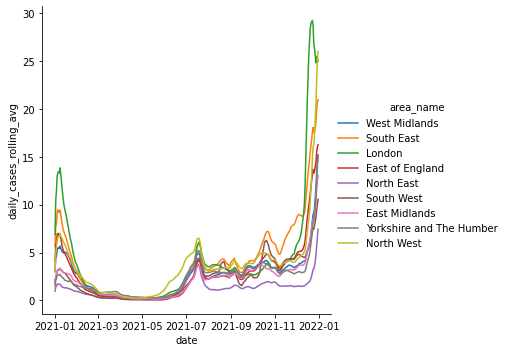

In [ ]:
df = clean_cvd_df[['date', 'area_name', 'cumulative_cases_rate']]
ax=plt.figure(figsize=(10,5))
sns.relplot(x="date", y="cumulative_cases_rate", hue="area_name",kind='line',  data=df);

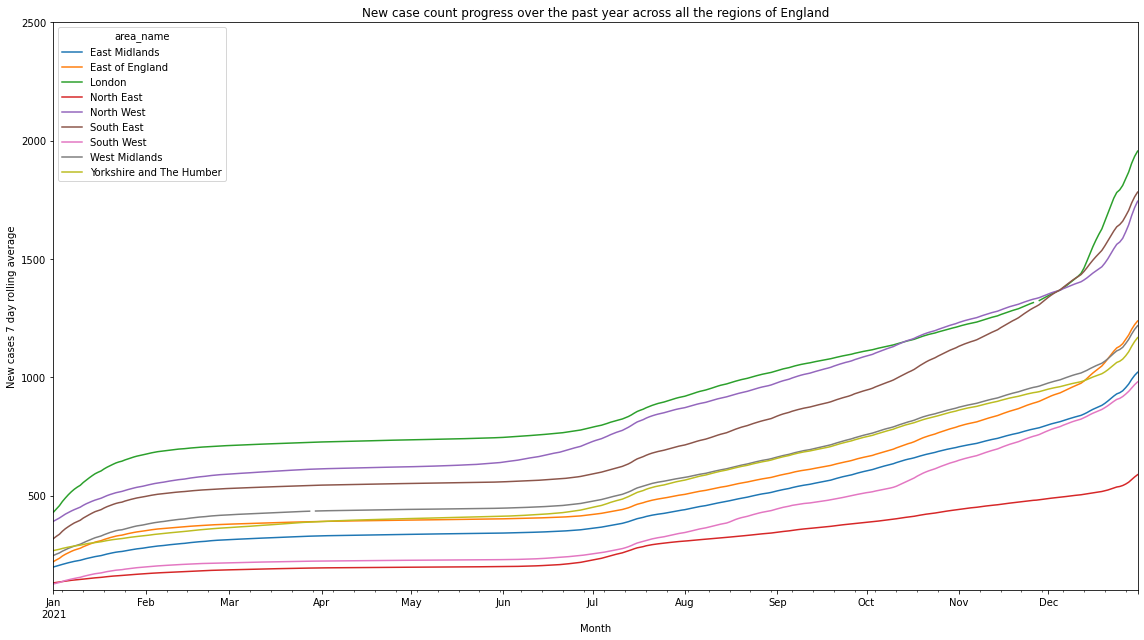

In [ ]:
# daily case count of all regions in England
df = clean_cvd_df[['date', 'area_name', 'cumulative_cases']]
# create a pivot table, set date as index, area as column, and daily cases rolling average as value
table = pd.pivot_table(df, columns='area_name', index='date', values='cumulative_cases')
table.plot(figsize=(16,9), sharex=False, legend = True)
plt.ylabel('New cases 7 day rolling average')
plt.xlabel('Month')
plt.title('New case count progress over the past year across all the regions of England')
plt.ylim(100,2500)
plt.tight_layout()

## Household data

In [ ]:
# Import data from Households by household size, regions of England and GB constituent countries
# https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/families/datasets/householdsbyhouseholdsizeregionsofenglandandukconstituentcountries

excel_file = "/content/drive/MyDrive/Sheffield/householdsizebyregionstable52021corrected.xlsx"
household_by_region = pd.ExcelFile(excel_file)

In [ ]:
hh_df = household_by_region

In [ ]:
df_list = {}
for names in household_by_region.sheet_names:
  for region_name in area_names:
    if region_name in names:
      region_val = region_name.replace(' ', '_')
      df_list[f'{region_val.lower()}_df'] = household_by_region.parse(names, skiprows = 11)
print(df_list.keys())


dict_keys(['north_east_df', 'north_west_df', 'yorkshire_and_the_humber_df', 'east_midlands_df', 'west_midlands_df', 'east_of_england_df', 'london_df', 'south_east_df', 'south_west_df'])


In [ ]:
for item, df in df_list.items():
  globals()[item] = df
  print(item)

north_east_df
north_west_df
yorkshire_and_the_humber_df
east_midlands_df
west_midlands_df
east_of_england_df
london_df
south_east_df
south_west_df


In [ ]:
df = tidyDataFrame(north_east_df)
df.drop(df.iloc[:, -2:], inplace=True, axis = 1)
df.columns = ['area_name', area_names[0]]
df_n = df.set_index('area_name').transpose()
north_east_df  = tidyColumns(df_n)

In [ ]:
df = tidyDataFrame(north_west_df)
df.drop(df.iloc[:, -2:], inplace=True, axis = 1)
df.columns = ['area_name', area_names[1]]
df_n = df.set_index('area_name').transpose()
north_west_df  = tidyColumns(df_n)

In [ ]:
df = tidyDataFrame(yorkshire_and_the_humber_df)
df.drop(df.iloc[:, -2:], inplace=True, axis = 1)
df.columns = ['area_name', area_names[2]]
df_n = df.set_index('area_name').transpose()
yorkshire_and_the_humber_df  = tidyColumns(df_n)

In [ ]:
df = tidyDataFrame(east_midlands_df)
df.drop(df.iloc[:, -2:], inplace=True, axis = 1)
df.columns = ['area_name', area_names[3]]
df_n = df.set_index('area_name').transpose()
east_midlands_df  = tidyColumns(df_n)

In [ ]:
df = tidyDataFrame(west_midlands_df)
df.drop(df.iloc[:, -2:], inplace=True, axis = 1)
df.columns = ['area_name', area_names[4]]
df_n = df.set_index('area_name').transpose()
west_midlands_df  = tidyColumns(df_n)

In [ ]:
df = tidyDataFrame(east_of_england_df)
df.drop(df.iloc[:, -2:], inplace=True, axis = 1)
df.columns = ['area_name', area_names[5]]
df_n = df.set_index('area_name').transpose()
east_of_england_df  = tidyColumns(df_n)

In [ ]:
df = tidyDataFrame(london_df)
df.drop(df.iloc[:, -2:], inplace=True, axis = 1)
df.columns = ['area_name', area_names[6]]
df_n = df.set_index('area_name').transpose()
london_df  = tidyColumns(df_n)

In [ ]:
df = tidyDataFrame(south_east_df)
df.drop(df.iloc[:, -2:], inplace=True, axis = 1)
df.columns = ['area_name', area_names[7]]
df_n = df.set_index('area_name').transpose()
south_east_df  = tidyColumns(df_n)

In [ ]:
df = tidyDataFrame(south_west_df)
df.drop(df.iloc[:, -2:], inplace=True, axis = 1)
df.columns = ['area_name', area_names[8]]
df_n = df.set_index('area_name').transpose()
south_west_df  = tidyColumns(df_n)

In [ ]:
household_df = pd.concat([north_east_df, north_west_df, yorkshire_and_the_humber_df, east_midlands_df, west_midlands_df, east_of_england_df, london_df, south_east_df, south_west_df])

In [ ]:
household_df = household_df.reset_index()
household_df = household_df.rename_axis(None, axis = 'columns')
household_df = household_df.rename(columns= {'index':'area_name','average_household_size_(number_of_people)':'average_household_size','six_people_':'six_people'})
household_df = household_df.drop(columns=['six_or_more_people','seven_or_more_people'])

In [ ]:
household_df

,area_name,one_person,two_people,three_people,four_people,five_people,six_people,all_households,average_household_size
0,North East,393.0,393.0,179.0,136.0,45.0,13.0,1166.0,2.24
1,North West,1044.0,1026.0,494.0,399.0,140.0,51.0,3161.0,2.29
2,Yorkshire and The Humber,734.0,824.0,352.0,292.0,110.0,33.0,2355.0,2.31
3,East Midlands,601.0,710.0,336.0,267.0,72.0,33.0,2035.0,2.35
4,West Midlands,679.0,871.0,413.0,353.0,98.0,44.0,2464.0,2.38
5,East of England,683.0,913.0,439.0,395.0,117.0,31.0,2587.0,2.41
6,London,920.0,1105.0,629.0,623.0,213.0,51.0,3569.0,2.55
7,South East,989.0,1290.0,594.0,611.0,170.0,52.0,3729.0,2.45
8,South West,706.0,928.0,319.0,339.0,90.0,26.0,2421.0,2.30


Text(0.5, 1.0, 'Number of one person households across all the regions in England')

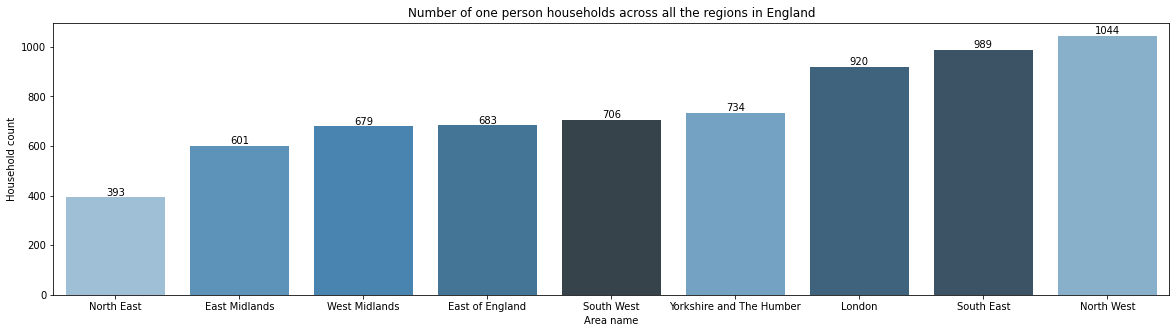

In [ ]:
ranks = household_df.one_person.sort_values().index
palette = sns.color_palette('Blues_d', len(ranks))
df = household_df[['area_name','one_person']].sort_values(by='one_person')
plt.subplots(figsize=(20,5))
ax = sns.barplot(y=df.one_person, x = df.area_name,palette=np.array(palette)[ranks])
plt.xlabel('Area name')
plt.ylabel('Household count')
ax.bar_label(ax.containers[0])
plt.title('Number of one person households across all the regions in England')

Text(0.5, 1.0, 'Number of two people households across all the regions in England')

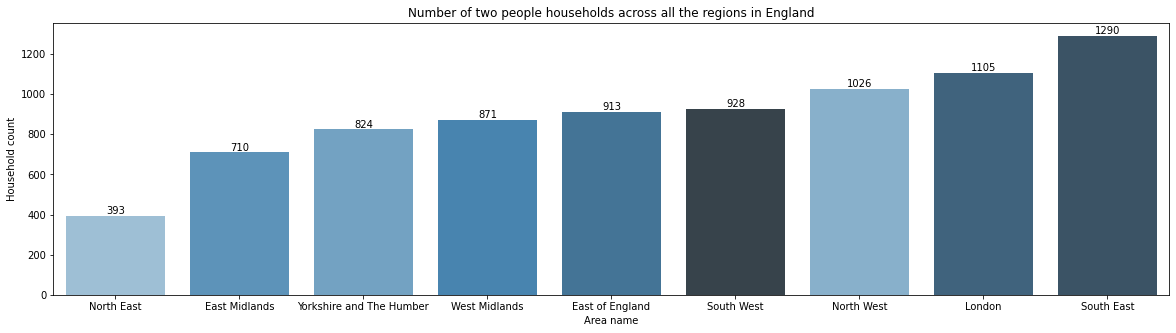

In [ ]:
ranks = household_df.two_people.sort_values().index
palette = sns.color_palette('Blues_d', len(ranks))
df = household_df[['area_name','two_people']].sort_values(by='two_people')
plt.subplots(figsize=(20,5))
ax = sns.barplot(y=df.two_people, x = df.area_name,palette=np.array(palette)[ranks])
plt.xlabel('Area name')
plt.ylabel('Household count')
ax.bar_label(ax.containers[0])
plt.title('Number of two people households across all the regions in England')

Text(0.5, 1.0, 'Number of three people households across all the regions in England')

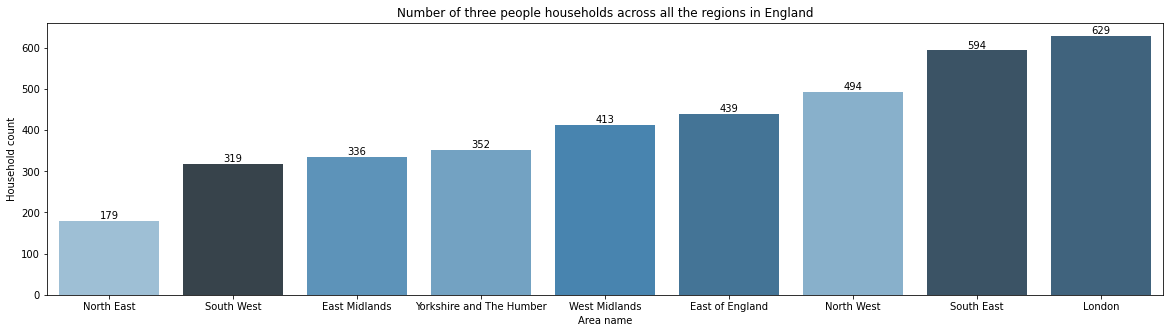

In [ ]:
ranks = household_df.three_people.sort_values().index
palette = sns.color_palette('Blues_d', len(ranks))
df = household_df[['area_name','three_people']].sort_values(by='three_people')
plt.subplots(figsize=(20,5))
ax = sns.barplot(y=df.three_people, x = df.area_name,palette=np.array(palette)[ranks])
plt.xlabel('Area name')
plt.ylabel('Household count')
ax.bar_label(ax.containers[0])
plt.title('Number of three people households across all the regions in England')

Text(0.5, 1.0, 'Number of four people households across all the regions in England')

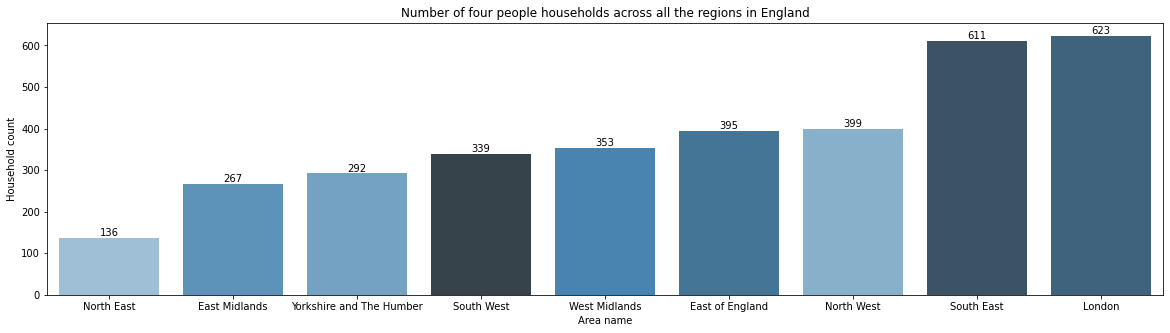

In [ ]:
ranks = household_df.four_people.sort_values().index
palette = sns.color_palette('Blues_d', len(ranks))
df = household_df[['area_name','four_people']].sort_values(by='four_people')
plt.subplots(figsize=(20,5))
ax = sns.barplot(y=df.four_people, x = df.area_name,palette=np.array(palette)[ranks])
plt.xlabel('Area name')
plt.ylabel('Household count')
ax.bar_label(ax.containers[0])
plt.title('Number of four people households across all the regions in England')

Text(0.5, 1.0, 'Number of five people households across all the regions in England')

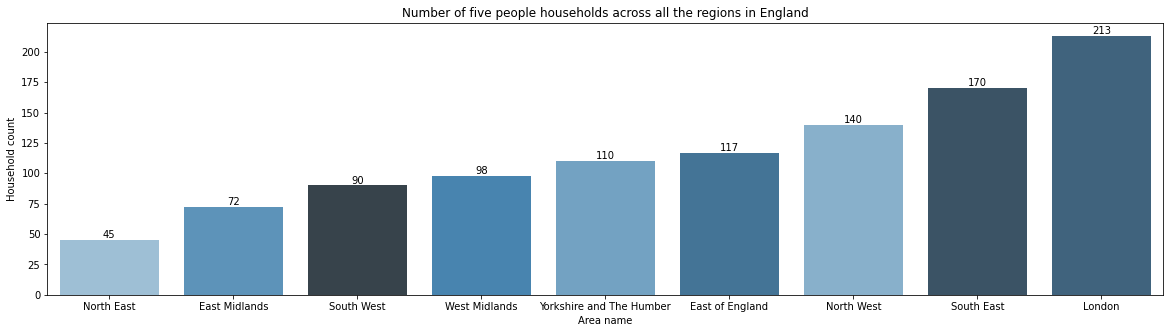

In [ ]:
ranks = household_df.five_people.sort_values().index
palette = sns.color_palette('Blues_d', len(ranks))
df = household_df[['area_name','five_people']].sort_values(by='five_people')
plt.subplots(figsize=(20,5))
ax = sns.barplot(y=df.five_people, x = df.area_name,palette=np.array(palette)[ranks])
plt.xlabel('Area name')
plt.ylabel('Household count')
ax.bar_label(ax.containers[0])
plt.title('Number of five people households across all the regions in England')

Text(0.5, 1.0, 'Number of six people households across all the regions in England')

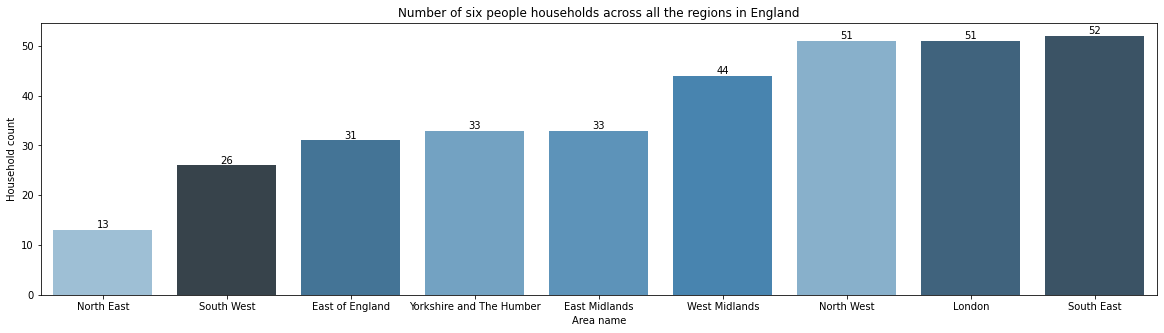

In [ ]:
ranks = household_df.six_people.sort_values().index
palette = sns.color_palette('Blues_d', len(ranks))
df = household_df[['area_name','six_people']].sort_values(by='six_people')
plt.subplots(figsize=(20,5))
ax = sns.barplot(y=df.six_people, x = df.area_name,palette=np.array(palette)[ranks])
plt.xlabel('Area name')
plt.ylabel('Household count')
ax.bar_label(ax.containers[0])
plt.title('Number of six people households across all the regions in England')

Text(0.5, 1.0, 'Average household size across all the regions in England')

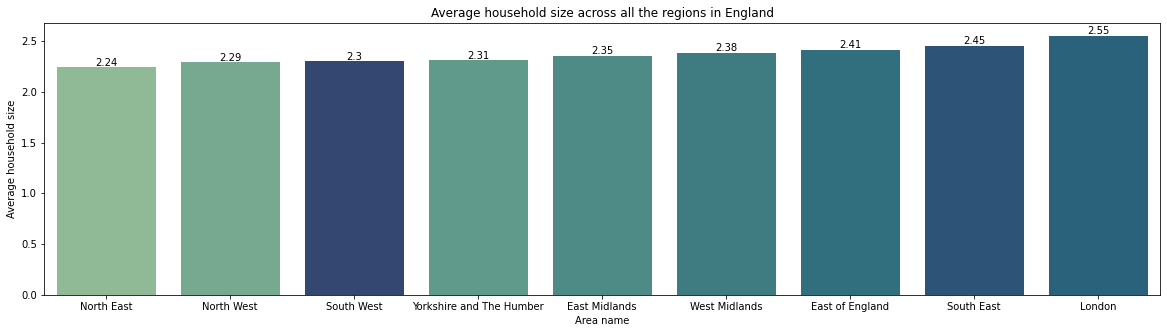

In [ ]:
ranks = household_df.average_household_size.sort_values().index
palette = sns.color_palette('crest', len(ranks))
df = household_df[['area_name','average_household_size']].sort_values(by='average_household_size')
plt.subplots(figsize=(20,5))
ax = sns.barplot(y=df.average_household_size, x = df.area_name,palette=np.array(palette)[ranks])
plt.xlabel('Area name')
plt.ylabel('Average household size')
ax.bar_label(ax.containers[0])
plt.title('Average household size across all the regions in England')

In [ ]:
# from IPython.core.pylabtools import figsize
# select and shape data
# df = household_df.drop(columns = ['all_households', 'average_household_size'])
# f, ax = plt.subplots(nrows=len(df), sharex=True, figsize= (20, len(df)*4.5))
# # col_map = plt.get_cmap('Paired')
# sns.catplot( x = df.values, y=df.area_name ,width = 0.5,  # color =col_map.colors
#            )
# # ax.bar(x=df.area_name, height=df.two_people, width = 0.2, # color =col_map.colors
#           # )
# plt.title('Over all households over various regions of England', fontsize = 20)
# plt.xlabel('Regions', fontsize=20)
# plt.ylabel('households', fontsize=20)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=18)

# df.plot(kind = "line", rot =15, subplots=True, figsize = (10,50))

## Population data retrieved from ONS

In [ ]:
# Import data from Population and household estimates, England and Wales: Census 2021 on ONS site:
# https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationandhouseholdestimatesenglandandwalescensus2021

data_file = "/content/drive/MyDrive/Sheffield/census2021firstresultsenglandwales1.xlsx"
data = pd.ExcelFile(data_file)

In [ ]:
res_pop_col_names = ['area_code', 'area_name', 'pop_dnsty_per_sqkm','total_pop_per_1000']

In [ ]:
res_pop_df = data.parse('P01', skiprows=6, na_values=['NA'])

In [ ]:
res_pop_df = tidyColumns(res_pop_df)
res_pop_df = res_pop_df.rename(columns = {res_pop_df.columns[0] : res_pop_col_names[0],
                                          res_pop_df.columns[2] : res_pop_col_names[3]})
eng_pop = res_pop_df[res_pop_df.area_code.str.contains('^E9200', regex=True)]
eng_pop_val = eng_pop.total_pop_per_1000
eng_pop_val

1    56489800
Name: total_pop_per_1000, dtype: int64

In [ ]:
res_pop_df = res_pop_df[res_pop_df.area_code.str.contains('^E1200', regex=True)]
res_pop_df['total_pop_per_1000'] = round(res_pop_df['total_pop_per_1000']/1000,2)

In [ ]:
res_pop_df = res_pop_df.drop(columns=['females','males'])

In [ ]:
res_pop_density_df = data.parse('P04',skiprows=6, na_values=['NA'])

In [ ]:
res_pop_density_df = tidyColumns(res_pop_density_df)
res_pop_density_df.columns = res_pop_col_names[0:3]

In [ ]:
res_pop_dsty_df = res_pop_density_df[res_pop_density_df.area_code.str.contains('^E1200', regex=True)]

In [ ]:
final_pop_df = res_pop_df.merge(res_pop_dsty_df, how = 'outer')

In [ ]:
final_pop_df

,area_code,area_name,total_pop_per_1000,pop_dnsty_per_sqkm
0,E12000001,North East,2647.1,308
1,E12000002,North West,7417.3,526
2,E12000003,Yorkshire and The Humber,5480.8,356
3,E12000004,East Midlands,4880.2,312
4,E12000005,West Midlands,5950.8,458
5,E12000006,East of England,6334.5,331
6,E12000007,London,8799.8,5598
7,E12000008,South East,9278.1,486
8,E12000009,South West,5701.2,239


Text(0.5, 1.0, 'Population across all the regions in England')

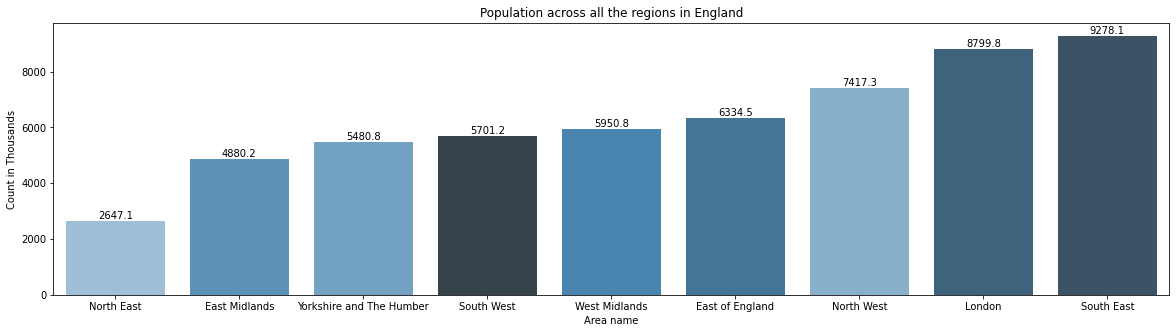

In [ ]:
ranks = final_pop_df.total_pop_per_1000.sort_values().index
palette = sns.color_palette('Blues_d', len(ranks))
df = final_pop_df[['area_name','total_pop_per_1000']].sort_values(by='total_pop_per_1000')
plt.subplots(figsize=(20,5))
ax = sns.barplot(y=df.total_pop_per_1000, x = df.area_name,palette=np.array(palette)[ranks])
plt.xlabel('Area name')
plt.ylabel('Count in Thousands')
ax.bar_label(ax.containers[0])
plt.title('Population across all the regions in England')

Text(0.5, 1.0, 'Population density per kilometre across all the regions in England')

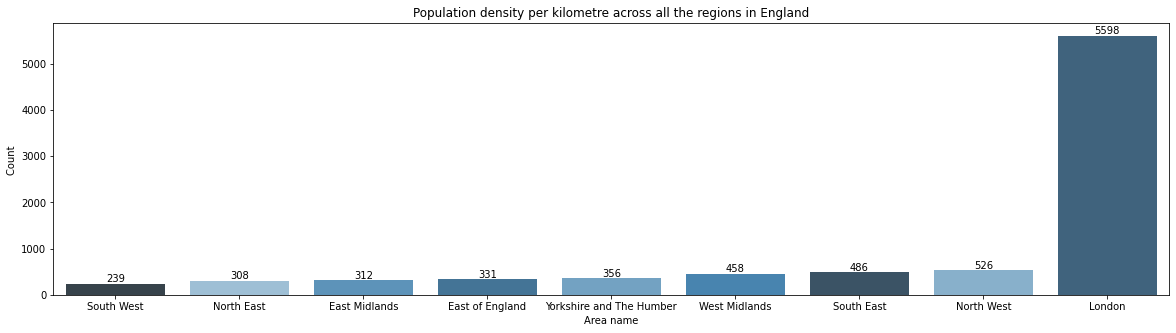

In [ ]:
ranks = final_pop_df.pop_dnsty_per_sqkm.sort_values().index
palette = sns.color_palette('Blues_d', len(ranks))
df = final_pop_df[['area_name','pop_dnsty_per_sqkm']].sort_values(by='pop_dnsty_per_sqkm')
plt.subplots(figsize=(20,5))
ax = sns.barplot(y=df.pop_dnsty_per_sqkm, x = df.area_name,palette=np.array(palette)[ranks])
plt.xlabel('Area name')
plt.ylabel('Count ')
ax.bar_label(ax.containers[0])
plt.title('Population density per kilometre across all the regions in England')

## Merge household and population data

In [ ]:
df = pd.merge(final_pop_df, household_df, on = 'area_name', how = 'outer')

In [ ]:
df_new = pd.merge(clean_cvd_df, df,on = ['area_name','area_code'], how = "outer")

Text(0, 0.5, 'new cases 7-day rolling average in thousands')

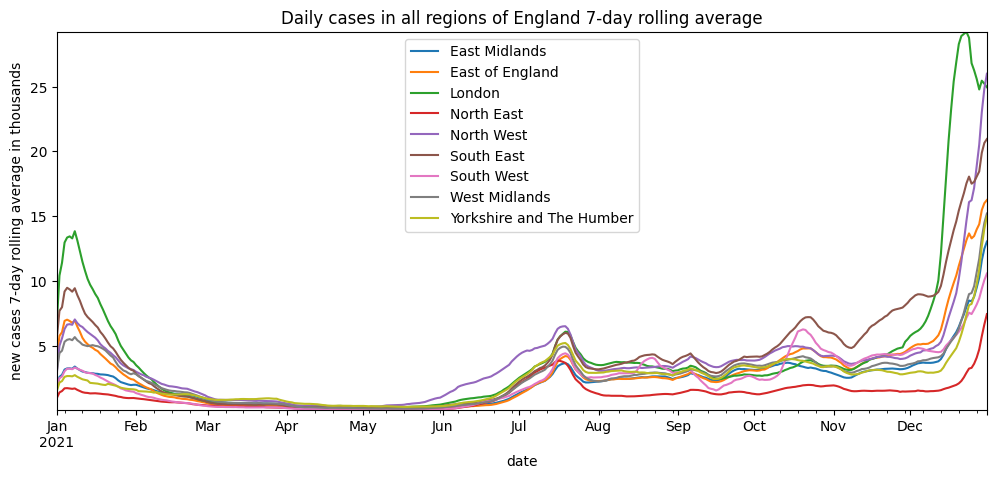

In [ ]:
# Line plot for daily cases across all regions of England
area_cum_cases = df_new[['date', 'area_name', 'daily_cases_rolling_avg']].set_index('date')
# plot
area_cumulative_cases = plt.figure(figsize=(12,5), dpi=100)
plt.title('Daily cases in all regions of England 7-day rolling average')

area_cum_cases.groupby('area_name').daily_cases_rolling_avg.plot(legend = True) # group by area then plot
plt.ylim([min(area_cum_cases.daily_cases_rolling_avg), max(area_cum_cases.daily_cases_rolling_avg)])
plt.ylabel('new cases 7-day rolling average in thousands')

Text(0, 0.5, 'new deaths 7-day rolling average in thousands')

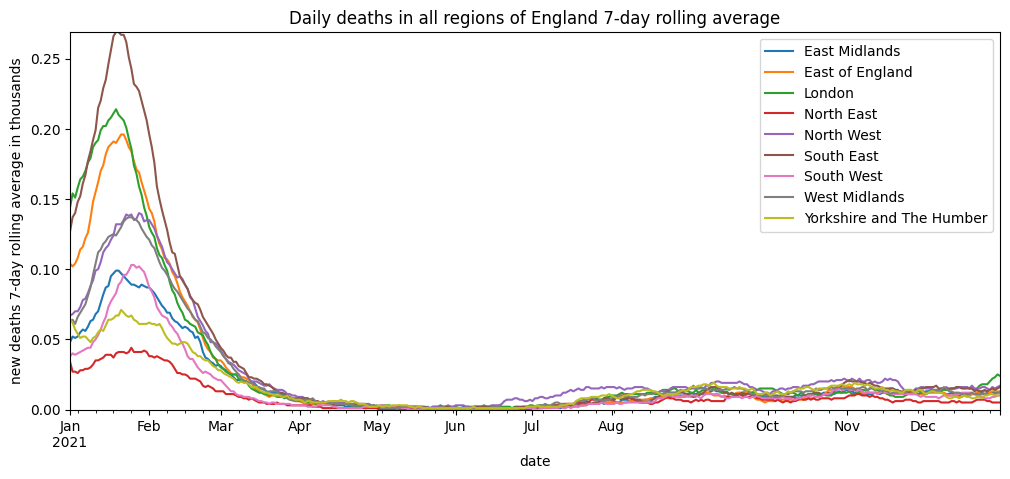

In [ ]:
# Line plot for daily deaths of all regions in England
area_cum_cases = df_new[['date', 'area_name', 'daily_deaths_rolling_avg']].set_index('date')
# plot
area_cumulative_cases = plt.figure(figsize=(12,5), dpi=100)
plt.title('Daily deaths in all regions of England 7-day rolling average')
# group by area then plot
area_cum_cases.groupby('area_name').daily_deaths_rolling_avg.plot(legend = True)
plt.ylim([min(area_cum_cases.daily_deaths_rolling_avg), max(area_cum_cases.daily_deaths_rolling_avg)])
plt.ylabel('new deaths 7-day rolling average in thousands')

#### Profiling report

In [ ]:
# profile = ProfileReport(temp, title = "Pandas Profiling Report")
# profile.to_notebook_iframe()

In [ ]:
temp = df_new

In [ ]:
temp.describe()

,cumulative_deaths_rate,cumulative_cases_rate,cumulative_cases,daily_cases,cumulative_deaths,daily_deaths,daily_cases_rolling_avg,daily_deaths_rolling_avg,total_pop_per_1000,pop_dnsty_per_sqkm,one_person,two_people,three_people,four_people,five_people,six_people,all_households,average_household_size
count,3285.000000,3.285000e+03,3284.000000,3286.000000,3285.000000,3285.000000,3.287000e+03,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000
mean,19985.126332,9.305771e+05,600.670463,2858.959830,14.773699,21.373516,2.738271e+06,21895.167797,6277.312930,958.371159,749.919075,895.611804,417.285367,379.510496,117.245513,37.117432,2609.914207,2.364506
std,4189.183511,3.946462e+05,317.364237,3673.041554,5.076071,37.994361,3.145529e+06,38152.540527,1911.414259,1644.977991,192.590617,238.166287,133.254058,147.406123,48.214021,12.610011,746.461759,0.089750
min,6050.000000,2.059700e+05,126.600000,44.000000,4.600000,0.000000,7.214286e+04,0.000000,2647.100000,239.000000,393.000000,393.000000,179.000000,136.000000,45.000000,13.000000,1166.000000,2.240000
25%,17770.000000,6.402800e+05,371.550000,539.000000,10.700000,3.000000,5.465714e+05,3714.290000,5480.800000,312.000000,679.000000,824.000000,336.000000,292.000000,90.000000,31.000000,2355.000000,2.300000
50%,20800.000000,7.996900e+05,539.900000,2265.500000,15.200000,10.000000,2.392571e+06,10142.860000,5950.800000,356.000000,706.000000,913.000000,413.000000,353.000000,110.000000,33.000000,2464.000000,2.350000
75%,22780.000000,1.207720e+06,766.675000,3653.500000,19.500000,17.000000,3.632357e+06,15571.430000,7417.300000,486.000000,920.000000,1026.000000,494.000000,399.000000,140.000000,51.000000,3161.000000,2.410000
max,28290.000000,2.173720e+06,1955.900000,38864.000000,23.900000,294.000000,2.922529e+07,269428.570000,9278.100000,5598.000000,1044.000000,1290.000000,629.000000,623.000000,213.000000,52.000000,3729.000000,2.550000


# Exploratory Data Analysis - EDA

In [ ]:
# Scatter plots

for column in clean_cvd_df.columns:
  plt.figure(figsize=(16,9))
  sns.relplot(x = column,y='cumulative_cases', data=clean_cvd_df)
  plt.title("Scatter plot between Cumulative cases and {} \n".format(column))

<AxesSubplot:xlabel='cumulative_cases', ylabel='Count'>

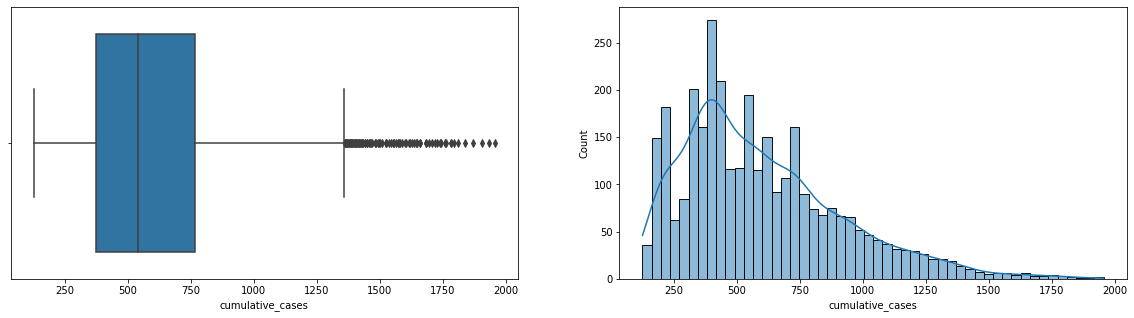

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(x=temp['cumulative_cases'], ax=ax[0])
sns.histplot(temp['cumulative_cases'], kde=True, bins=50, ax=ax[1])

<AxesSubplot:xlabel='cumulative_deaths', ylabel='Count'>

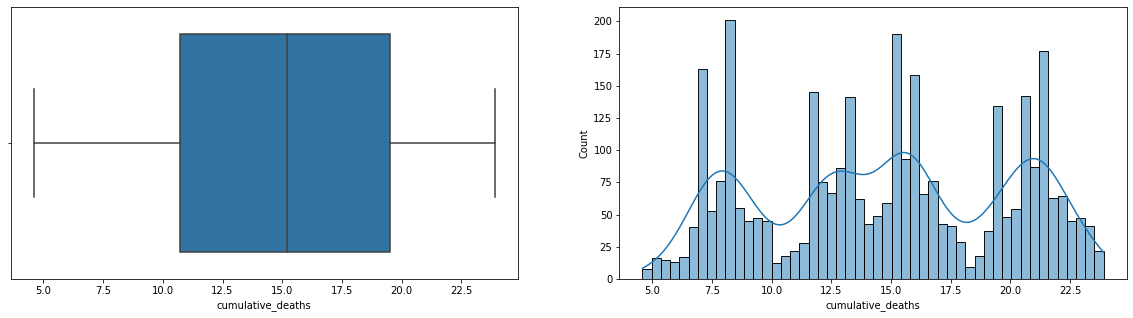

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(x=temp['cumulative_deaths'], ax=ax[0])
sns.histplot(temp['cumulative_deaths'], kde=True, bins=50, ax=ax[1])

<AxesSubplot:xlabel='cumulative_cases_rate', ylabel='Count'>

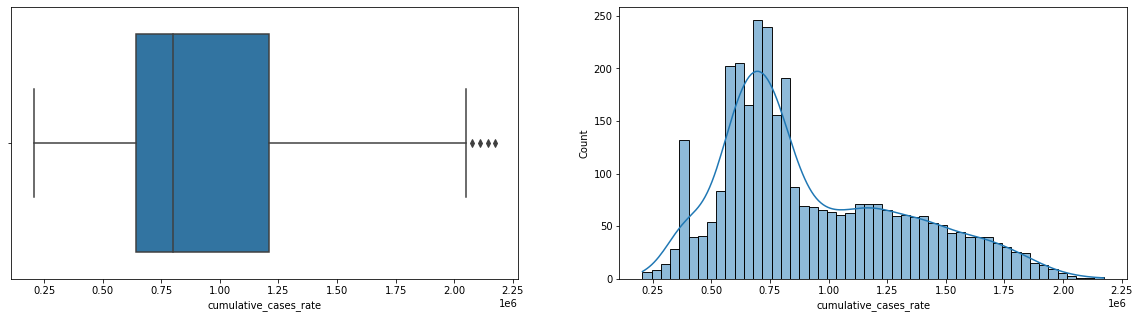

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(x=temp['cumulative_cases_rate'], ax=ax[0])
sns.histplot(temp['cumulative_cases_rate'], kde=True, bins=50, ax=ax[1])

<AxesSubplot:xlabel='cumulative_deaths_rate', ylabel='Count'>

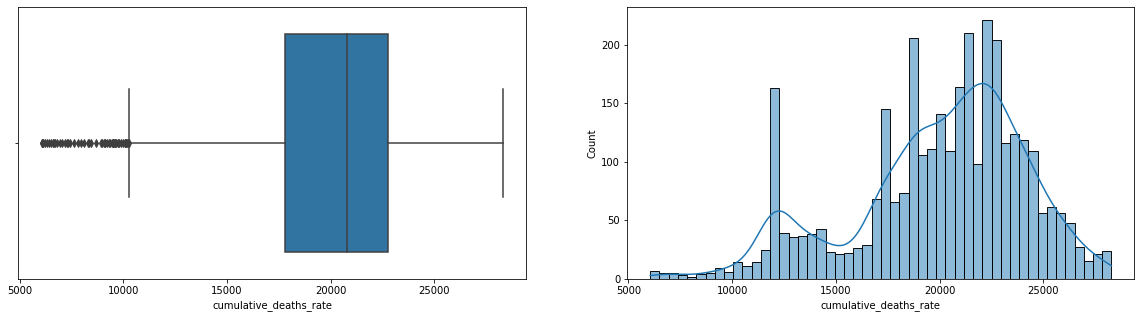

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(x=temp['cumulative_deaths_rate'], ax=ax[0])
sns.histplot(temp['cumulative_deaths_rate'], kde=True, bins=50, ax=ax[1])

In [ ]:

# plt.figure(figsize=(20,10))
# df = clean_cvd_df[['area_name','one_person']]
# fig=sns.bar(x = df, labels='area_name', height ='one_person',colors='RdBu')
# fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
# fig.show()

In [ ]:
temp=df_new

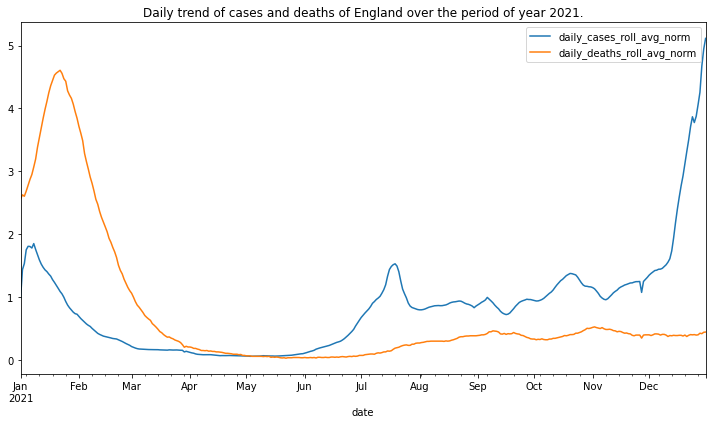

In [ ]:
# Daily trend of cases and death of entire nation over the period of one year.

df = temp[['date', 'area_name', 'daily_cases_rolling_avg', 'daily_deaths_rolling_avg']]
# find the max values
max_cases = max(df['daily_cases_rolling_avg'])
max_deaths = max(df['daily_deaths_rolling_avg'])
# add two new columns
df = df.assign(daily_cases_roll_avg_norm = lambda x: x.daily_cases_rolling_avg/max_cases,
          daily_deaths_roll_avg_norm = lambda x: x.daily_deaths_rolling_avg/max_deaths)
# sum based on date
cases_norm_sum = df.groupby('date').daily_cases_roll_avg_norm.sum()
deaths_norm_sum = df.groupby('date').daily_deaths_roll_avg_norm.sum()

# plot
plt.figure(figsize=(10,6))
cases_norm_sum.plot(legend=True)
deaths_norm_sum.plot(legend=True)
plt.title('Daily trend of cases and deaths of England over the period of year 2021.')
plt.tight_layout()


In [ ]:
feat_sel_df = temp

In [ ]:
feat_sel_df['week_of_year'] = feat_sel_df['date'].dt.week
feat_sel_df = feat_sel_df.drop(columns=['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
# To remove categorical columns
feat_sel_df = feat_sel_df.drop(columns=['area_name','area_code','daily_cases','daily_deaths','all_households'
                              ])

In [ ]:
col_names = ['cumulative_cases','cumulative_cases_rate','daily_cases_rolling_avg',
             'cumulative_deaths','cumulative_deaths_rate','daily_deaths_rolling_avg',
             'week_of_year','total_pop_per_1000','pop_dnsty_per_sqkm','one_person','two_people','three_people',
             'four_people','five_people','six_people','average_household_size']

In [ ]:
feat_sel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3283 entries, 0 to 3282
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cumulative_deaths_rate    3283 non-null   float64
 1   cumulative_cases_rate     3283 non-null   float64
 2   cumulative_cases          3283 non-null   float64
 3   cumulative_deaths         3283 non-null   float64
 4   daily_cases_rolling_avg   3283 non-null   float64
 5   daily_deaths_rolling_avg  3283 non-null   float64
 6   total_pop_per_1000        3283 non-null   float64
 7   pop_dnsty_per_sqkm        3283 non-null   int64  
 8   one_person                3283 non-null   float64
 9   two_people                3283 non-null   float64
 10  three_people              3283 non-null   float64
 11  four_people               3283 non-null   float64
 12  five_people               3283 non-null   float64
 13  six_people                3283 non-null   float64
 14  average_

#### Scatter and Box plot

In [ ]:
# add regression line with regplot()

def scatter_plot(x,y,df):
  slope, intercept, r_val, p_val, std_err = stats.linregress(df[df[x].notnull()][x],df[df[x].notnull()][y])
  REG_RESULT = 'Linear Regression:\ny = {}x + {}\nR\u00b2 = {}\n p = {}\n'.format(round(slope,2),
                                                                                 round(intercept,2),
                                                                                 round(r_val**2,2),
                                                                                 round(p_val,3))
  print('Linear Regression for relationship between {} and {} for all regions of England:'.format(x,y))
  print('Stats:\n Slope: {}\n Intercept: {}\n r-value: {}\n p-value: {}'.format(round(slope,2),
                                                                                 round(intercept,2),
                                                                                 round(r_val**2,2),
                                                                                 round(p_val,3)))

  # Create Plot
  f, ax = plt.subplots(figsize=(10,5))
  sns.scatterplot(data=df, x=x, y=y, hue="area_name")

  plt.title('Relationship between {} and {}'.format(x,y))
  ax.set_xlabel(x)
  ax.set_ylabel('{}'.format(y))

  # Plot Best Fit Line
  REG_RANGE = np.array([df[x].min(),df[x].max()])
  plt.plot(REG_RANGE, slope*REG_RANGE + intercept,linestyle='--')
  # Annotate LinReg result
  ax.annotate(REG_RESULT,xy=(0.5,0.5),xytext=(.5,.05),xycoords = 'axes fraction')

  plt.show()


Linear Regression for relationship between pop_dnsty_per_sqkm and cumulative_cases for all regions of England:
Stats:
 Slope: 0.08
 Intercept: 528.22
 r-value: 0.15
 p-value: 0.0


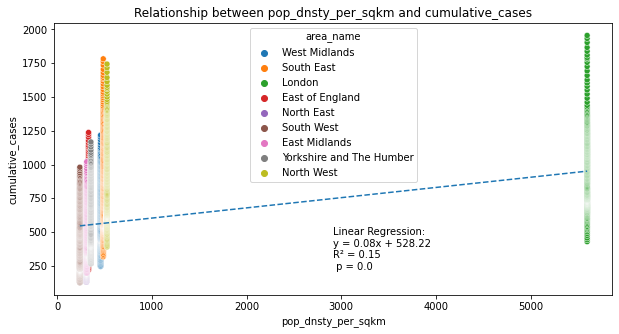

In [ ]:
# for x in col_names:
scatter_plot('pop_dnsty_per_sqkm','cumulative_cases', temp)


In [ ]:
# plt.subplots( figsize= (16,9))
# sns.histplot(data = numeric_df, x = 'cumulative_cases_rate', bins = 50)

In [ ]:
for column in numeric_df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(final_df[column], kde=True, bins = 50)

In [ ]:
# plt.figure(figsize=(20,9))
# sns.violinplot(y='cumulative_cases', x ='area_name',data = temp, box=True)

### Feature Selection

In [ ]:
data = feat_sel_df.drop(columns=['week_of_year','cumulative_cases_rate','daily_cases_rolling_avg',
             'cumulative_deaths','cumulative_deaths_rate','daily_deaths_rolling_avg'])

In [ ]:
df = data.astype('int')

y = data.pop('cumulative_cases') #target column
X = data  #independent columns

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
# SelectKBest class to extract all best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(17,'Score'))  #print best features in order

                    Specs        Score
7              six_people  1831.026012
4            three_people  1792.932506
6             five_people  1734.732088
2              one_person  1625.364352
0      total_pop_per_1000  1549.455737
5             four_people  1323.965726
3              two_people  1128.460953
8  average_household_size   741.455499
1      pop_dnsty_per_sqkm   592.844091


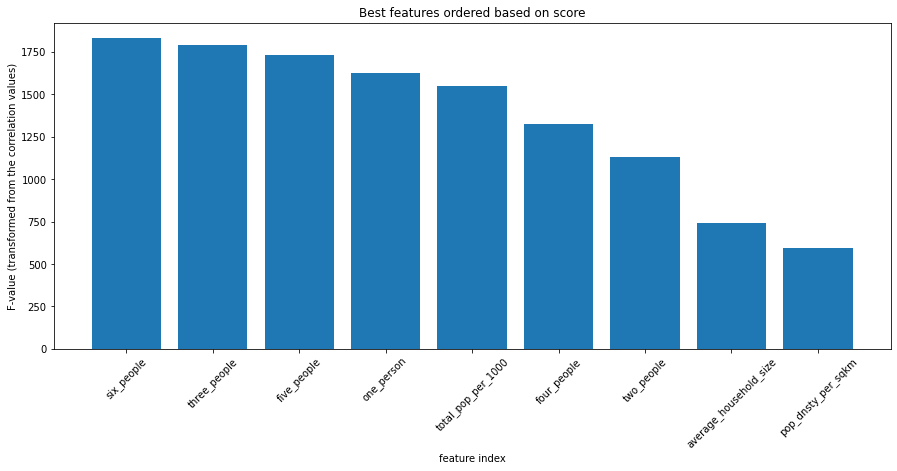

In [ ]:
# Plot the scores for the features
plt.subplots(figsize=(15,6))
featureScores = featureScores.sort_values(by='Score', ascending = False)
# plt.bar([i for i in range(len(featureScores.Specs))], featureScores.Score)
plt.bar(featureScores.Specs, featureScores.Score)
plt.title('Best features ordered based on score')
plt.xlabel("feature index")
plt.xticks(rotation = 45)
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

### Correlation

#### Spearman

In [ ]:
for var in data.columns:
  coef, pval = stats.spearmanr(data[var], data['cumulative_cases'])
  print('Spearman\'s correlation coefficient with',var,': {} and p-value: {}'
        .format(round(coef,3),round(pval,3)))
  # # interpret the significance
  # alpha = 0.05
  # if pval > alpha:
  #   print('Samples are uncorrelated (fail to reject H0) p= {}'.format(round(pval,3)))
  # else:
  #   print('Samples are correlated (reject H0) p= {}\n' .format(round(pval,3)))

Spearman's correlation coefficient with cumulative_cases : 1.0 and p-value: 0.0
Spearman's correlation coefficient with total_pop_per_1000 : 0.583 and p-value: 0.0
Spearman's correlation coefficient with pop_dnsty_per_sqkm : 0.656 and p-value: 0.0
Spearman's correlation coefficient with one_person : 0.55 and p-value: 0.0
Spearman's correlation coefficient with two_people : 0.52 and p-value: 0.0
Spearman's correlation coefficient with three_people : 0.648 and p-value: 0.0
Spearman's correlation coefficient with four_people : 0.603 and p-value: 0.0
Spearman's correlation coefficient with five_people : 0.628 and p-value: 0.0
Spearman's correlation coefficient with six_people : 0.622 and p-value: 0.0
Spearman's correlation coefficient with average_household_size : 0.402 and p-value: 0.0


Text(0.5, 1.0, 'Spearmans correlation - Heat map')

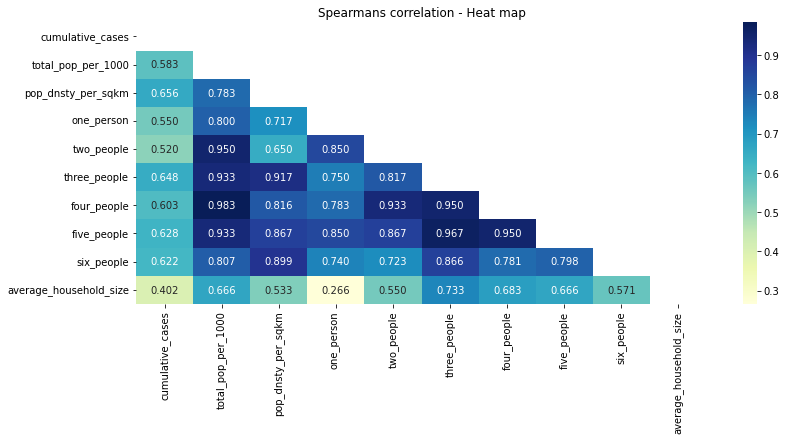

In [ ]:
spearmans_corr = data.corr(method='spearman')
fig, ax = plt.subplots(figsize=(12,6))
col_map = plt.get_cmap('YlGnBu')
corr_plot = sns.heatmap(spearmans_corr, annot=True,
                        mask = np.triu(np.ones_like(spearmans_corr, dtype=bool)),
                        fmt='.3f',
                        ax=ax,
                        cmap=col_map)
plt.tight_layout()
plt.title('Spearmans correlation - Heat map')

#### Pearson

 Colored describe for df
temp_f.style.background_gradient(cmap="Blues", subset=['Confirmed', 'Active'])\
.background_gradient(cmap="Greens", subset=['Recovered'])\
.background_gradient(cmap="Reds", subset=['Deaths'])

https://www.kaggle.com/code/eswarchandt/geospatial-analysis-on-covid-19-day-to-day-track#Basic-EDA

In [ ]:
correlations = numeric_df.corr()['daily_cases_rolling_avg'].sort_values(ascending=False).drop('daily_cases_rolling_avg',axis=0).to_frame()
correlations.plot(kind='bar')

In [ ]:
correlations = numeric_df.corr()['daily_deaths_rolling_avg'].sort_values(ascending=False).drop('daily_deaths_rolling_avg',axis=0).to_frame()
correlations.plot(kind='bar')

Text(0.5, 1.0, 'Pearsons Correlation')

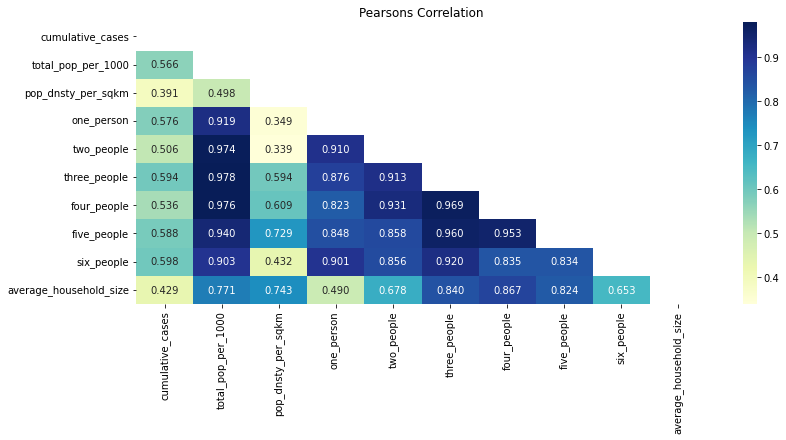

In [ ]:
pearsons_corr = data.corr()
fig, ax = plt.subplots(figsize=(12,6))
col_map = plt.get_cmap('YlGnBu')
corr_plot = sns.heatmap(pearsons_corr, annot=True,
                        mask = np.triu(np.ones_like(pearsons_corr, dtype=bool)),
                        fmt='.3f',
                        ax=ax,
                        cmap=col_map)
plt.tight_layout()
plt.title('Pearsons Correlation')

In [ ]:
pearsons_features = pearsons_corr.iloc[1:,:1].sort_values(by= 'cumulative_cases', ascending = False)
pearsons_features

### PLOT - NA

In [ ]:
# Calculate average weekly deaths and cases per 100,000 people
temp['daily_deaths_rolling_avg_per_100000'] = (
    temp['daily_deaths_rolling_avg']*100000/float(eng_pop_val))
temp['daily_cases_rolling_avg_per_100000'] = (
    temp['daily_cases_rolling_avg']*100000/float(eng_pop_val))

In [ ]:
# # Plot cumulative death-rate per 100,000 population over time for UK and Devolved Nations
# # https://www.kaggle.com/code/vascodegama/uk-covid-19-cases-deaths-vaccines-regions/notebook
# pop, ax = plt.subplots(figsize=(15,6))
# sns.lineplot(data=temp, x=temp.date, y="cumulative_deaths_rate", hue="area_name")
# plt.title('Cumulative Death per 100,000 population for regions in England')
# ax.grid(linestyle=':', linewidth='0.5')
# ax.set_xlim(datetime.fromisoformat('2020-03-01'),temp.date.iloc[-2])
# ax.set_ylim(0)
# ax.legend(ncol=2,title=None,loc=(0.45,0.05))


# # Full UK Lockdown 1 Text
# TEXT = [('2020-03-19','First UK National Lockdown'),
#         ('2020-05-24','NHS Test & Trace'),
#         ('2020-06-25','First Local Lockdown'),
#         ('2020-10-10','3-Tier System'),
#         ('2020-11-01','England Lockdown'),
#         ('2020-11-28','Pfizer Vaccine Approval'),
#         ('2020-12-26','Oxf/AstZen Vaccine Approval')
#        ]

# for i,j in TEXT[0:6]:
#     ax.text(datetime.fromisoformat(i), temp['cumulative_deaths'].max(), j, rotation=90,va='top')
# for i,j in TEXT[6:]:
#     ax.text(datetime.fromisoformat(i), 3, j, rotation=90)

# # Vertical Lines

# ax.axvline(datetime.fromisoformat('2020-03-23'), ls='--', color='black')
# ax.axvline(datetime.fromisoformat('2020-05-28'), ls='--', color='black')
# ax.axvline(datetime.fromisoformat('2020-06-29'), ls='--', color='black')
# ax.axvline(datetime.fromisoformat('2020-10-14'), ls='--', color='black')
# ax.axvline(datetime.fromisoformat('2020-10-23'), ls='--', color='black')
# ax.axvline(datetime.fromisoformat('2020-11-05'), ls='--', color='black')
# ax.axvline(datetime.fromisoformat('2020-12-02'), ls='--', color='black')
# ax.axvline(datetime.fromisoformat('2020-12-30'), ls='--', color='black')

# # plt.savefig('UK_Death_Rates_Overview.jpg',dpi=300)
# pop.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<function matplotlib.pyplot.show(*args, **kw)>

# Models

Train test split

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.30,random_state =7)

In [ ]:
train_test_df = feat_sel_df.drop(columns=['cumulative_cases_rate','daily_cases_rolling_avg',
             'cumulative_deaths','cumulative_deaths_rate','daily_deaths_rolling_avg'])

In [ ]:
train = feat_sel_df.loc[train_test_df['week_of_year'] < 37]

In [ ]:
test = feat_sel_df.loc[(train_test_df['week_of_year'] >=37) & (train_test_df['week_of_year'] <= 53)]

In [ ]:
print('train shape: {}'.format(train.shape))
print('test shape: {}'.format(test.shape))

train shape: (2267, 16)
test shape: (1016, 16)


In [ ]:
X_train = train.drop(columns=['cumulative_cases', 'week_of_year'])

In [ ]:
y_train = train['cumulative_cases']

In [ ]:
X_test = test.drop(columns=['cumulative_cases','week_of_year'])

In [ ]:
y_test = test['cumulative_cases']

In [ ]:
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (2267, 14)
X_test shape: (1016, 14)
y_train shape: (2267,)
y_test shape: (1016,)


#### Feature scaling

In [ ]:
# # Retrieve column names
col = X_train.columns

# Standardising for faster convergence
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[col] = scaler.fit_transform(X_train[col])

# test data
X_test[col] = scaler.transform(X_test[col])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import math
from sklearn.linear_model import Lasso, LassoCV
from sklearn import model_selection
from pandas.core.common import random_state
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import statsmodels.api as sm

### Linear Regression

In [ ]:
lr = LinearRegression()
lr_tuned=lr.fit(X_train,y_train)
y_lr_pred = lr_tuned.predict(X_test)

errors = abs(y_lr_pred - y_test)
mape = 100 * np.mean(errors / y_test)
exp_var_score = explained_variance_score(y_test,y_lr_pred)
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('''R-squared (R2): {:0.4f}\n
Mean Absolute Error(MAE): {:0.4f}\n
Mean Squared Error (MSE): {:0.4f}\n
Root Mean Squared Error (RMSE): {:0.4f}\n
Explained variance score: {:0.4f}'''
    .format(r2_score(y_test,y_lr_pred),
      mean_absolute_error(y_test, y_lr_pred),
      mean_squared_error(y_test, y_lr_pred),
      math.sqrt(mean_squared_error(y_test, y_lr_pred)),
      exp_var_score))

Model Performance
Average Error: 68.9946 degrees.
R-squared (R2): 0.9225
Mean Absolute Error(MAE): 68.9946
Mean Squared Error (MSE): 8329.7720
Root Mean Squared Error (RMSE): 91.2676
Explained variance score: 0.9342


In [ ]:
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X).fit()
est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       cumulative_cases   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.500e+04
Date:                Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:49:03   Log-Likelihood:                -10174.
No. Observations:                2267   AIC:                         2.038e+04
Df Residuals:                    2253   BIC:                         2.046e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       40.1502      3.020     13.296      0.000      34.228      46.072
cumulative_deaths_rate    -326.1297      8.542    -38.181      0.000    -342.880    -309.379
cumulative_cases_rate        4.8105      0.057     83.667      0.000       4.698       4.923
cumulative_deaths           69.4065      1.452     47.794      0.000      66.559      72.254
daily_cases_rolling_avg     12.4698      0.453     27.549      0.000      11.582      13.357
daily_deaths_rolling_avg   117.7033     21.367      5.509      0.000      75.803     159.604
total_pop_per_1000          -0.1104      0.023     -4.747      0.000      -0.156      -0.065
pop_dnsty_per_sqkm           0.0450      0.002     18.437      0.000       0.040       0.050
one_person                   0.0871      0.045      1.940      0.053      -0.001       0.175
two_people                   0.4514      0.035     13.083      0.000       0.384       0.519
three_people                 0.1343      0.100      1.340      0.180      -0.062       0.331
four_people                 -0.2025      0.131     -1.548      0.122      -0.459       0.054
five_people                 -1.4052      0.089    -15.806      0.000      -1.580      -1.231
six_people                  -4.1406      0.215    -19.291      0.000      -4.562      -3.720
average_household_size      89.2797      6.714     13.297      0.000      76.113     102.447
==============================================================================
Omnibus:                      239.820   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              960.003
Skew:                           0.456   Prob(JB):                    3.45e-209
Kurtosis:                       6.054   Cond. No.                     1.67e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.77e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Random Forest

In [ ]:
# Hyper parameter tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation,
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 144, 188, 233,
                                                         277, 322, 366, 411,
                                                         455, 500]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 277,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [ ]:
# Model after turing
rf = RandomForestRegressor(n_estimators = 277, bootstrap=True, n_jobs = -1, max_depth = 30, random_state=42,
                           max_features = "sqrt")
# Fitting
rf_tuned=rf.fit(X_train,y_train)
y_pred = rf_tuned.predict(X_test)

In [ ]:
errors = abs(y_pred - y_test)
mape = 100 * np.mean(errors / y_test)
exp_var_score = explained_variance_score(y_test,y_pred)
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('''R-squared (R2): {:0.4f}\n
Mean Absolute Error(MAE): {:0.4f}\n
Mean Squared Error (MSE): {:0.4f}\n
Root Mean Squared Error (RMSE): {:0.4f}\n
Explained variance score: {:0.4f}'''
    .format(r2_score(y_test,y_pred),
      mean_absolute_error(y_test, y_pred),
      mean_squared_error(y_test, y_pred),
      math.sqrt(mean_squared_error(y_test, y_pred)),
      exp_var_score))

Model Performance
Average Error: 227.8674 degrees.
R-squared (R2): 0.2378
Mean Absolute Error(MAE): 227.8674
Mean Squared Error (MSE): 81959.7693
Root Mean Squared Error (RMSE): 286.2862
Explained variance score: 0.7133


In [ ]:
rf_imp_features = pd.DataFrame({'features':X_train.columns,'importance':np.round(rf_tuned.feature_importances_,3)})
rf_imp_features = rf_imp_features.sort_values('importance',ascending=False).set_index('features')

In [ ]:
rf_imp_features

,importance
features,
cumulative_deaths,0.221
cumulative_cases_rate,0.088
three_people,0.087
total_pop_per_1000,0.074
pop_dnsty_per_sqkm,0.074
four_people,0.074
six_people,0.069
one_person,0.064
five_people,0.063


### LASSO Regression

In [ ]:
# hyper parameter tuning
folds=KFold(n_splits=5, shuffle=True,random_state=42)
params={'alpha':[0.001,0.01,0.1,1,5.0,10.0]}
ls_model=Lasso()
model_cv=GridSearchCV(estimator=ls_model, param_grid=params, scoring='r2', cv=folds, return_train_score=True,verbose=2)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.008e+05, tolerance: 7.274e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.314e+05, tolerance: 7.539e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.171e+05, tolerance: 7.378e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.006e+05, tolerance: 7.283e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ..........................................alpha=5.0; total time=   0.0s
[CV] END ..........................................alpha=5.0; total time=   0.0s
[CV] END ..........................................alpha=5.0; total time=   0.0s
[CV] END ..........................................alpha=5.0; total time=   0.0s
[CV] END ..........................................alpha=5.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.950e+05, tolerance: 9.189e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=2)

In [ ]:
# model tuning
lasso = Lasso(alpha=0.01, normalise = True)
lasso_tuned= lasso.fit(X_train, y_train)
y_ls_pred = lasso.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.950e+05, tolerance: 9.189e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
model_cv.best_params_

{'alpha': 0.01}

In [ ]:
errors = abs(y_ls_pred - y_test)
mape = 100 * np.mean(errors / y_test)
exp_var_score = explained_variance_score(y_test,y_ls_pred)
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('''R-squared (R2): {:0.4f}\nMean Absolute Error(MAE): {:0.4f}\nMean Squared Error (MSE): {:0.4f}\nRoot Mean Squared Error (RMSE): {:0.4f}\nExplained variance score: {:0.4f}'''
    .format(r2_score(y_test,y_ls_pred),
      mean_absolute_error(y_test, y_ls_pred),
      mean_squared_error(y_test, y_ls_pred),
      math.sqrt(mean_squared_error(y_test, y_ls_pred)),
      exp_var_score))

Model Performance
Average Error: 69.4572 degrees.
R-squared (R2): 0.9237
Mean Absolute Error(MAE): 69.4572
Mean Squared Error (MSE): 8205.6914
Root Mean Squared Error (RMSE): 90.5853
Explained variance score: 0.9363
